In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)

100%|██████████| 292k/292k [00:00<00:00, 65.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4


In [ ]:
import os

# The path to the dataset files is stored in the 'path' variable from cell cK0l1IPN5_0p
print("Listing files in:", path)
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

Listing files in: /root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4
/root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4/car details v4.csv
/root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4/CAR DETAILS FROM CAR DEKHO.csv
/root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4/Car details v3.csv
/root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4/car data.csv


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4/car data.csv')
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<ipython-input-8-e823d16aadc6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, palette='viridis')
<ipython-input-8-e823d16aadc6>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Transmission', y='Selling_Price', data=df, estimator='mean', ci=None, palette='mako')
<ipython-input-8-e823d16aadc6>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transmission', y='Selling_Price', data=df, estimator='mean', ci=None, palette='mako')


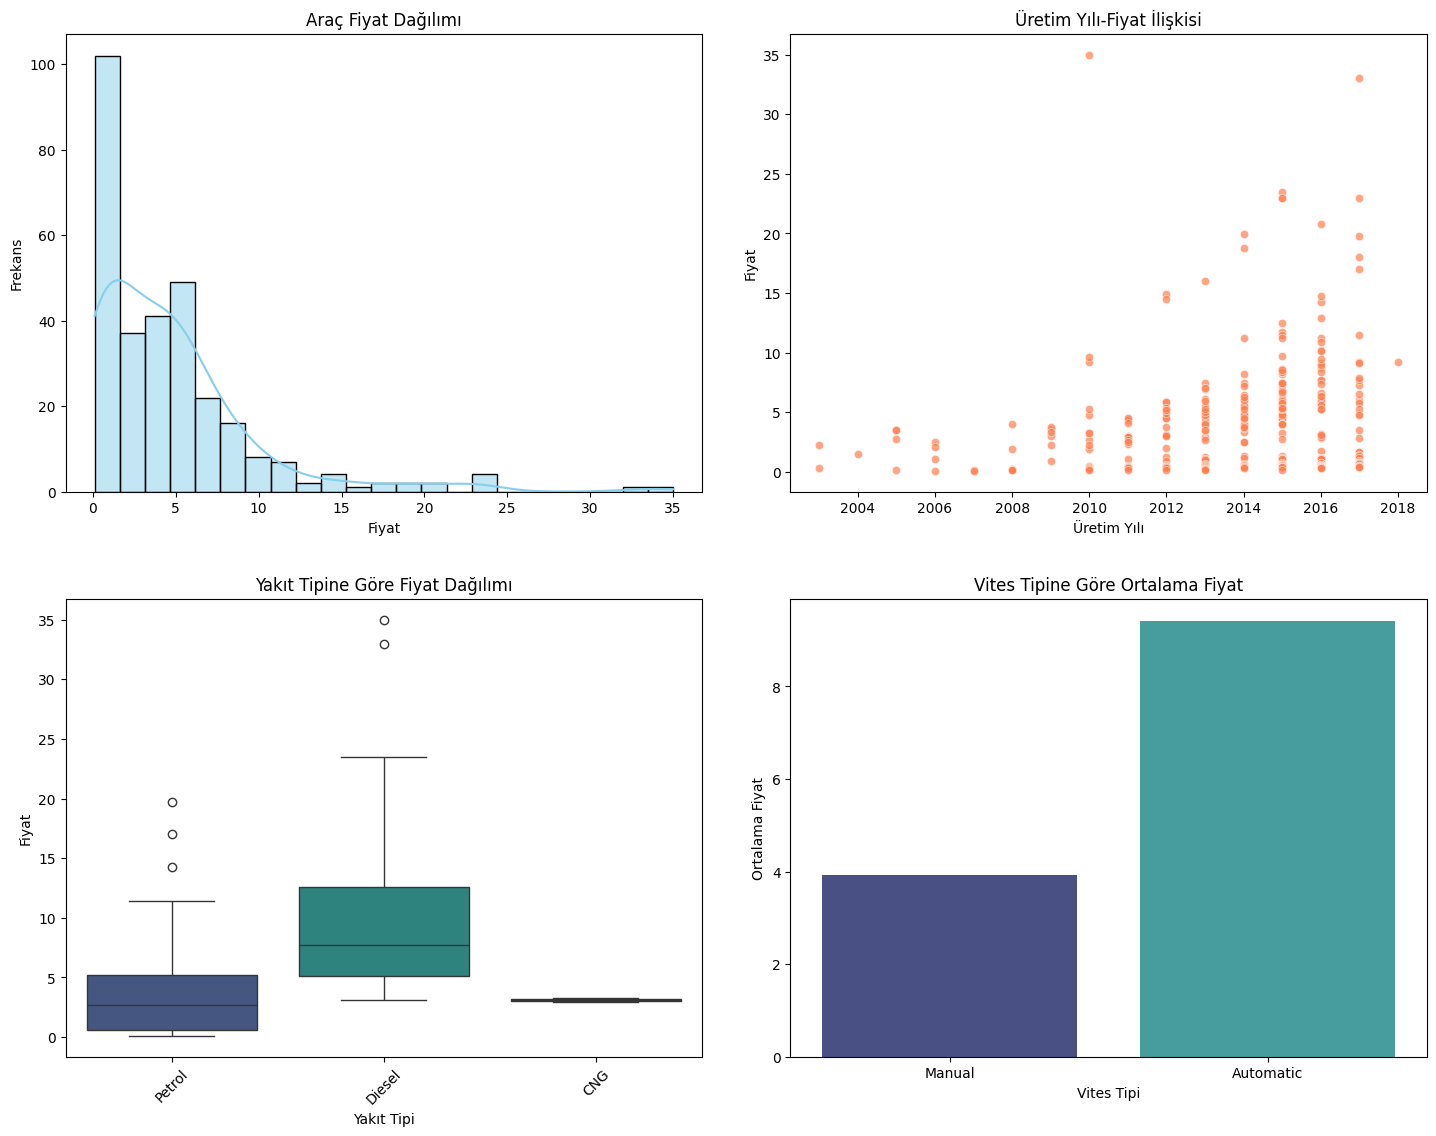

In [ ]:

plt.figure(figsize=(15, 12))
# Fiyat dağılımı
plt.subplot(2, 2, 1)  # (satır, sütun, pozisyon)
sns.histplot(df['Selling_Price'], kde=True, color='skyblue')
plt.title('Araç Fiyat Dağılımı', fontsize=12)
plt.xlabel('Fiyat')
plt.ylabel('Frekans')

# Üretim yılı-fiyat
plt.subplot(2, 2, 2)
sns.scatterplot(x='Year', y='Selling_Price', data=df, color='coral', alpha=0.7)
plt.title('Üretim Yılı-Fiyat İlişkisi', fontsize=12)
plt.xlabel('Üretim Yılı')
plt.ylabel('Fiyat')

#  Yakıt tipi-fiyat ilişkisi
plt.subplot(2, 2, 3)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, palette='viridis')
plt.title('Yakıt Tipine Göre Fiyat Dağılımı', fontsize=12)
plt.xlabel('Yakıt Tipi')
plt.ylabel('Fiyat')
plt.xticks(rotation=45)

#vites tipi-fiyat ilişkisi
plt.subplot(2, 2, 4)
sns.barplot(x='Transmission', y='Selling_Price', data=df, estimator='mean', ci=None, palette='mako')
plt.title('Vites Tipine Göre Ortalama Fiyat', fontsize=12)
plt.xlabel('Vites Tipi')
plt.ylabel('Ortalama Fiyat')


plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
df['Vehicle_Age'] = 2025 - df['Year']

df = df.drop(['Car_Name', 'Year'], axis=1)

categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
numerical_features = ['Present_Price', 'Kms_Driven', 'Owner', 'Vehicle_Age']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [ ]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

Ortalama Kare Hata (MSE): 0.87
Kök Ortalama Kare Hata (RMSE): 0.93
R-Kare (R2) Skoru: 0.96


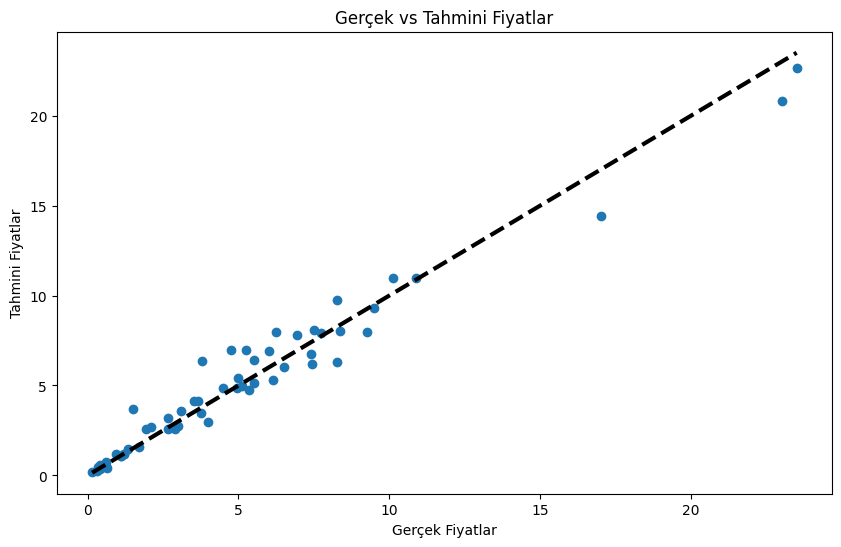

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Ortalama Kare Hata (MSE): {mse:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse:.2f}")
print(f"R-Kare (R2) Skoru: {r2:.2f}")

# Gerçek vs Tahmin edilen değerler
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('Tahmini Fiyatlar')
plt.title('Gerçek vs Tahmini Fiyatlar')
plt.show()